<a href="https://colab.research.google.com/github/pedroafleite/trace-elements-apatite-magnetite/blob/main/mineral_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [14]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [23]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [15]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [16]:
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 16s 85ms/step - loss: 3.0531 - accuracy: 0.4252 - val_loss: 1.6826 - val_accuracy: 0.6450
Epoch 2/20
16/16 [==============================] - 1s 48ms/step - loss: 1.4517 - accuracy: 0.6919 - val_loss: 1.3038 - val_accuracy: 0.7170
Epoch 3/20
16/16 [==============================] - 1s 48ms/step - loss: 1.0542 - accuracy: 0.7754 - val_loss: 1.1492 - val_accuracy: 0.7620
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 0.8641 - accuracy: 0.8175 - val_loss: 1.0864 - val_accuracy: 0.7590
Epoch 5/20
16/16 [==============================] - 1s 47ms/step - loss: 0.6722 - accuracy: 0.8592 - val_loss: 1.0055 - val_accuracy: 0.7960
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.5448 - accuracy: 0.8908 - val_loss: 0.9544 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 1s 48ms/step - loss: 0.4422 - accuracy: 0.9089 - val_loss: 0.9229 - val_accuracy: 0.8140
Epoch 8/20
1

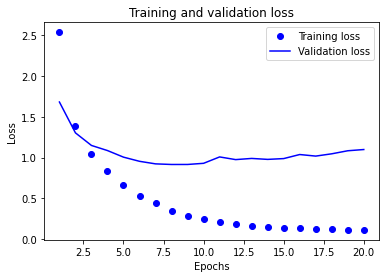

In [17]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

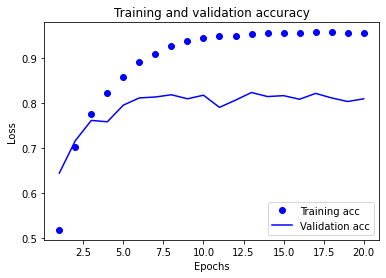

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(partial_x_train, 
          partial_y_train, 
          epochs=9, 
          batch_size=512, 
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 66ms/step - loss: 3.0757 - accuracy: 0.4324 - val_loss: 1.7178 - val_accuracy: 0.6430
Epoch 2/9
16/16 [==============================] - 1s 48ms/step - loss: 1.4772 - accuracy: 0.6967 - val_loss: 1.3073 - val_accuracy: 0.7090
Epoch 3/9
16/16 [==============================] - 1s 48ms/step - loss: 1.0537 - accuracy: 0.7813 - val_loss: 1.1250 - val_accuracy: 0.7620
Epoch 4/9
16/16 [==============================] - 1s 47ms/step - loss: 0.8347 - accuracy: 0.8268 - val_loss: 1.0145 - val_accuracy: 0.7880
Epoch 5/9
16/16 [==============================] - 1s 48ms/step - loss: 0.6420 - accuracy: 0.8621 - val_loss: 0.9497 - val_accuracy: 0.8040
Epoch 6/9
16/16 [==============================] - 1s 48ms/step - loss: 0.5182 - accuracy: 0.8924 - val_loss: 0.9336 - val_accuracy: 0.8120
Epoch 7/9
16/16 [==============================] - 1s 47ms/step - loss: 0.4081 - accuracy: 0.9200 - val_loss: 0.8991 - val_accuracy: 0.8220
Epoch 8/9
16/16 [===

In [24]:
results

[0.981367290019989, 0.7885128855705261]

In [25]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18967052537845058

In [27]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [28]:
np.sum(predictions[0])

1.0000001

In [29]:
np.argmax(predictions[0])

3

In [30]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)